In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('UNSW_NB15_training-set.csv')
test=pd.read_csv('UNSW_NB15_testing-set.csv')

In [3]:
# Print the number of train / test samples
print(f"Train data length: {len(train)}")
print(f"Test data length: {len(test)}")

Train data length: 82332
Test data length: 175341


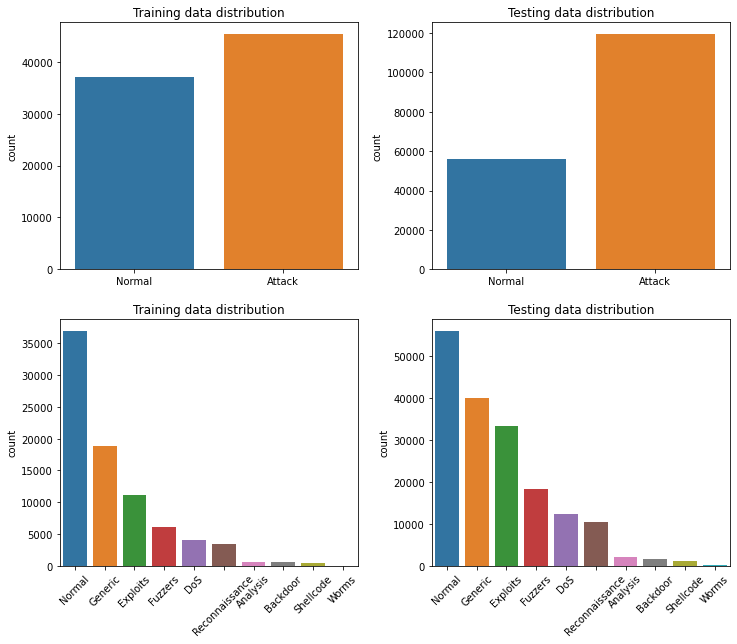

In [4]:
# Visualise the distribution of attacks and normal traffic (attack_cat)

f, axes = plt.subplots(2, 2, figsize=(12, 10))

# Create the plots
sns.countplot(x="label", data=train, ax=axes[0,0])
sns.countplot(x="label", data=test, ax=axes[0,1])
sns.countplot(x="attack_cat", data=train, ax=axes[1,0], order = train['attack_cat'].value_counts().index)
sns.countplot(x="attack_cat", data=test, ax=axes[1,1], order = test['attack_cat'].value_counts().index)

# Set the plot titles
axes[0,0].set_title("Training data distribution")
axes[1,0].set_title("Training data distribution")
axes[0,1].set_title("Testing data distribution")
axes[1,1].set_title("Testing data distribution")

# Rotate xticks for readability
axes[1,0].tick_params('x', labelrotation=45)
axes[1,1].tick_params('x', labelrotation=45)

# Change the xtick labels for attack / normal
axes[0,0].set_xticklabels(["Normal", "Attack"])
axes[0,1].set_xticklabels(["Normal", "Attack"])

# Remove xlabels
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[1,0].set_xlabel("")
axes[1,1].set_xlabel("")

# Add some space between the plots for y labels
plt.subplots_adjust(wspace=0.25)

In [5]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [6]:
train.shape,test.shape

((82332, 45), (175341, 45))

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [8]:
train.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [9]:
# Categorical variables
mask = (train.dtypes == np.object)
print(train.loc[:,mask].head())
list_cat = train.loc[:,mask].columns.tolist()
print(list_cat)
print(train.loc[:,mask].values)

  proto service state attack_cat
0   udp       -   INT     Normal
1   udp       -   INT     Normal
2   udp       -   INT     Normal
3   udp       -   INT     Normal
4   udp       -   INT     Normal
['proto', 'service', 'state', 'attack_cat']
[['udp' '-' 'INT' 'Normal']
 ['udp' '-' 'INT' 'Normal']
 ['udp' '-' 'INT' 'Normal']
 ...
 ['arp' '-' 'INT' 'Normal']
 ['arp' '-' 'INT' 'Normal']
 ['udp' '-' 'INT' 'Normal']]


In [10]:
# Numeric variables
mask = (train.dtypes != np.object)
print(train.loc[:,mask].head())
list_cat = train.loc[:,mask].columns.tolist()
print(list_cat)

   id       dur  spkts  dpkts  sbytes  dbytes         rate  sttl  dttl  \
0   1  0.000011      2      0     496       0   90909.0902   254     0   
1   2  0.000008      2      0    1762       0  125000.0003   254     0   
2   3  0.000005      2      0    1068       0  200000.0051   254     0   
3   4  0.000006      2      0     900       0  166666.6608   254     0   
4   5  0.000010      2      0    2126       0  100000.0025   254     0   

         sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  180363632.0  ...                 1                 1               2   
1  881000000.0  ...                 1                 1               2   
2  854400000.0  ...                 1                 1               3   
3  600000000.0  ...                 2                 1               3   
4  850400000.0  ...                 2                 1               3   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0             0           0    

In [11]:
train.loc[:,mask].describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [12]:
# Check whether the positive label (1) match attack categories, and whether attack categories match labelled data.

# all(iterable) returns True if all elements of the iterable are considered as true values
print(all(((train.label == 1) & (train.attack_cat != 'Normal')) == (train.attack_cat != 'Normal')))
print(all(((train.attack_cat != 'Normal') & (train.label == 1)) == (train.label == 1)))

True
True


In [13]:
train.attack_cat.value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [14]:
mask = (train.label == 1)
print(train.loc[mask,:].service.value_counts())
print(train.loc[mask,:].proto.value_counts())

-           19778
dns         18299
http         4274
smtp         1216
ftp           794
ftp-data      447
pop3          423
ssl            30
snmp           29
dhcp           26
radius          7
irc             5
ssh             4
Name: service, dtype: int64
udp     21321
tcp     15247
unas     3515
ospf      638
sctp      324
        ...  
bna        32
aris       32
il         32
pgm        32
ib         31
Name: proto, Length: 129, dtype: int64


In [15]:
mask = (train.label == 0)
print(train.loc[mask,:].service.value_counts())
print(train.loc[mask,:].proto.value_counts())

-           27375
http         4013
dns          3068
ftp-data      949
ftp           758
smtp          635
ssh           200
radius          2
Name: service, dtype: int64
tcp     27848
udp      8097
arp       987
ospf       38
igmp       30
Name: proto, dtype: int64


In [16]:
print(train.columns.values)
print(test.columns.values)

['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']
['id' 'dur' 'proto' 'service' 'state' 'spkts' 'dpkts' 'sbytes' 'dbytes'
 'rate' 'sttl' 'dttl' 'sload' 'dload' 'sloss' 'dloss' 'sinpkt' 'dinpkt'
 'sjit' 'djit' 'swin' 'stcpb' 'dtcpb' 'dwin' 'tcprtt' 'synack' 'ackdat'
 'smean' 'dmean' 'trans_depth' 'response_body_len' 'ct_srv_src'
 'ct_state_ttl' 'ct_dst_ltm' 'ct_src_dport_ltm' 'ct_dst_sport_ltm'
 'ct_dst_src_ltm' 'is_ftp_login' 'ct_ftp_cmd' 'ct_flw_http_mthd'
 'ct_src_ltm' 'ct_srv_dst' 'is_sm_ips_ports' 'attack_cat' 'label']


>Scaling the Data before doing anomoly detection.

>As anomoly detection methods works better with scaled data, but there is no compulsory need to do so.

>Scale only continious data

In [17]:
df = pd.concat([train, test], ignore_index=True)

In [18]:
# Remove unwanted columns
df.drop(['id', 'attack_cat'], inplace=True, axis=1)

In [19]:
# Perform one-hot encoding on categorical columns and join back to main train_data
one_hot = pd.get_dummies(df[["proto", "state", "service"]])
df = df.join(one_hot)

In [20]:
# Remove the original categorical columns
df.drop(["proto", "state", "service"], inplace=True, axis=1)

In [21]:
# Re split the data back into train / test
train_data = df.iloc[0:175341, 0:]
test_data = df.iloc[175341:, 0:]

In [22]:
# Create y_train and then drop the label from the training data
y_train = np.array(train_data["label"])
train_data.drop(["label"], inplace=True, axis=1)

y_test = np.array(test_data["label"])
test_data.drop(["label"], inplace=True, axis=1)

In [23]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [24]:
# Use min-max scaler to scale the features to 0-1 range
# Only fit the scaler on the train data!!
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_data)

# Scale the testing data
X_test = scaler.transform(test_data)

In [25]:
# Ensure our dataset splits are still correct
print(f"Train data shape: {X_train.shape} Train label shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape} Test label shape: {y_test.shape}")

Train data shape: (175341, 196) Train label shape: (175341,)
Test data shape: (82332, 196) Test label shape: (82332,)


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [27]:
# Logistic Regression
log = LogisticRegression(solver = "liblinear")
y_pred_log_fit = log.fit(X_train, y_train)
y_pred_log = y_pred_log_fit.predict(X_test)
log_accuracy = accuracy_score(y_test, y_pred_log)

In [28]:
log_accuracy

0.9473351795170772

In [29]:
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.47      0.81      0.60      3971
           1       0.99      0.95      0.97     78361

    accuracy                           0.95     82332
   macro avg       0.73      0.88      0.79     82332
weighted avg       0.97      0.95      0.95     82332



In [30]:
from sklearn.linear_model import SGDClassifier

In [31]:
# SGD Classifier
sgd = SGDClassifier()
sgd_fit = sgd.fit(X_train, y_train)
y_pred_sgd = sgd_fit.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred_sgd)

In [32]:
sgd_accuracy

0.9772627896808046

In [33]:
print(classification_report(y_test, y_pred_sgd))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      3971
           1       0.98      0.99      0.99     78361

    accuracy                           0.98     82332
   macro avg       0.90      0.84      0.87     82332
weighted avg       0.98      0.98      0.98     82332

